# Data Import

In [123]:
import pandas as pd

pathname="/Users/shivendrashukla/Documents/ETL Hive/Python Projects//Python_projects/Corona_virus_analyst_project/"
file_name="covid_19_data.csv"

In [440]:
# Set the display format for float values
pd.options.display.float_format = '{:.2f}'.format

# Suppress all warnings
import warnings
warnings.filterwarnings('ignore')

# DataFrame creation and printing data to check

In [126]:
df = pd.read_csv(pathname+file_name)
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


# Checking basic info of data

#### Printing the shape of DataFrame

In [130]:
df.shape

(306429, 8)

#### Printing the columns of DataFrame

In [133]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

#### Checking basic info of dataframe

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SNo              306429 non-null  int64  
 1   ObservationDate  306429 non-null  object 
 2   Province/State   228326 non-null  object 
 3   Country/Region   306429 non-null  object 
 4   Last Update      306429 non-null  object 
 5   Confirmed        306429 non-null  float64
 6   Deaths           306429 non-null  float64
 7   Recovered        306429 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 18.7+ MB


### Running describe on numerical columns of dataframe

In [139]:
df[["Confirmed","Deaths","Recovered"]].describe()

,Confirmed,Deaths,Recovered
count,3.064290e+05,306429.000000,3.064290e+05
mean,8.567091e+04,2036.403268,5.042029e+04
std,2.775516e+05,6410.938048,2.015124e+05
min,-3.028440e+05,-178.000000,-8.544050e+05
25%,1.042000e+03,13.000000,1.100000e+01
50%,1.037500e+04,192.000000,1.751000e+03
75%,5.075200e+04,1322.000000,2.027000e+04
max,5.863138e+06,112385.000000,6.399531e+06


# Questions which are to be Answered:

In [142]:
# 1.What is the total number of confirmed cases worldwide?
confirmed_cases = df["Confirmed"].sum()
print(f"Total number of confirmed corona virus cases world wide are : {confirmed_cases}")

Total number of confirmed corona virus cases world wide are : 26252051758.0


In [144]:
# 2.How many deaths have been reported globally?
reported_deaths = df["Deaths"].sum()
print(f"Total number of reported deaths globally is : {reported_deaths}")

Total number of reported deaths globally is : 624013017.0


In [146]:
# 3.What is the total number of recovered cases worldwide?
recovered_cases = df["Recovered"].sum()
print(f"Total number of Recovered corona virus cases world wide are : {recovered_cases}")

Total number of Recovered corona virus cases world wide are : 15450237912.0


In [148]:
# 4.How many countries/regions are represented in the dataset?
country_region=df['Country/Region'].nunique()
print(f"Total number of distinct Country/Region are : {country_region}")

Total number of distinct Country/Region are : 229


# Creation of Grouped data to answer Year wise Month wise counts of cases

In [241]:
# Conversion of Observation Date column to datetime data type
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])

# Adding a column which is formatted in desired format to the dataframe
df["ObservationDate_Mon_Year"]= df["ObservationDate"].dt.strftime('%Y-%m')

# Creation of df_cases dataframe by grouping of data based on Year and Month of Observation date and displaying the same
df_cases = df[["ObservationDate_Mon_Year","Confirmed","Deaths","Recovered"]].groupby(["ObservationDate_Mon_Year"]).sum().reset_index()

In [243]:
df_cases

,ObservationDate_Mon_Year,Confirmed,Deaths,Recovered
0,2020-01,3.898000e+04,905.0,8.970000e+02
1,2020-02,1.671960e+06,46898.0,3.808370e+05
2,2020-03,8.896092e+06,386607.0,2.707333e+06
3,2020-04,6.315526e+07,4200500.0,1.642218e+07
4,2020-05,1.448578e+08,9605979.0,5.421828e+07
5,2020-06,2.468008e+08,13294590.0,1.186654e+08
6,2020-07,4.319622e+08,18393019.0,2.423037e+08
7,2020-08,6.721921e+08,23894263.0,4.234511e+08
8,2020-09,8.951397e+08,28123886.0,6.083298e+08
9,2020-10,1.230014e+09,34288562.0,8.419494e+08


In [245]:
# Checking data types of columns of df_cases data frame
df_cases.dtypes

ObservationDate_Mon_Year     object
Confirmed                   float64
Deaths                      float64
Recovered                   float64
dtype: object

# Plotting Confirmed, Death and Recovered cases to understand the trend in data

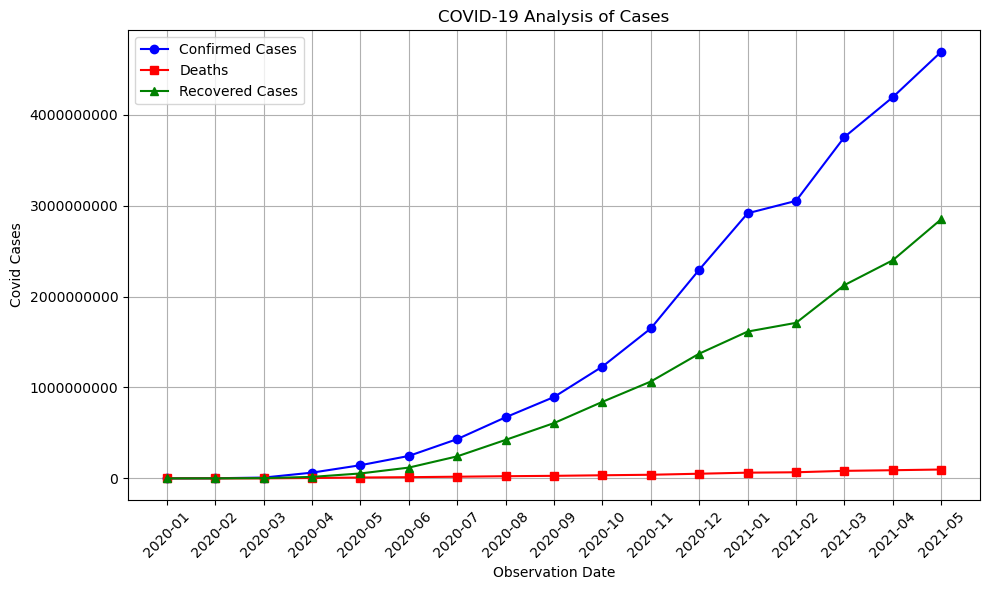

In [252]:
# Seting the figure size
plt.figure(figsize=(10, 6))

# Ploting the line chart
plt.plot(df_cases['ObservationDate_Mon_Year'], df_cases['Confirmed'], color="blue", label="Confirmed Cases",marker="o")
plt.plot(df_cases['ObservationDate_Mon_Year'], df_cases['Deaths'], color="red", label="Deaths",marker="s")
plt.plot(df_cases['ObservationDate_Mon_Year'], df_cases['Recovered'], color="green", label="Recovered Cases",marker="^")


# Adding labels and title
plt.xlabel('Observation Date')
plt.ylabel('Covid Cases')
plt.title('COVID-19 Analysis of Cases')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format the y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')


# Display the plot
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()

### Showing below data in table only does not make much sense. Hence, below data is shown in Tabular format followed by Graph for the same

In [415]:
# 5.What is the trend of confirmed cases over time globally?
df_cases[["ObservationDate_Mon_Year","Confirmed"]].sort_values(by = "Confirmed")

,ObservationDate_Mon_Year,Confirmed
0,2020-01,38980.00
1,2020-02,1671960.00
2,2020-03,8896092.00
3,2020-04,63155257.00
4,2020-05,144857836.00
5,2020-06,246800814.00
6,2020-07,431962227.00
7,2020-08,672192068.00
8,2020-09,895139725.00
9,2020-10,1230014166.00


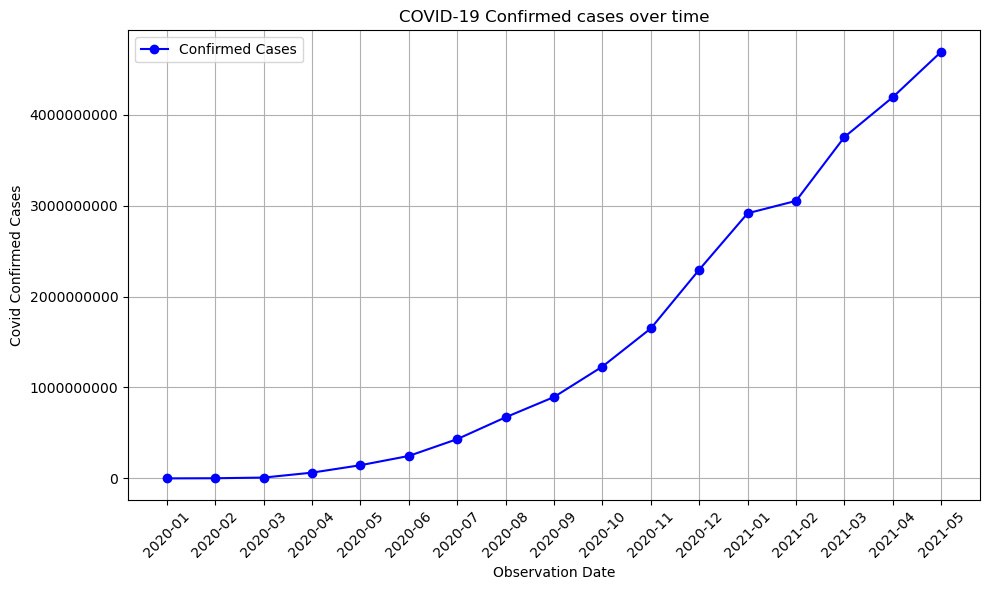

In [301]:
# 5.What is the trend of confirmed cases over time globally?

# Seting the figure size
plt.figure(figsize=(10, 6))

# Ploting the line chart
plt.plot(df_cases['ObservationDate_Mon_Year'], df_cases['Confirmed'], color="blue", label="Confirmed Cases",marker="o")

# Adding labels and title
plt.xlabel('Observation Date')
plt.ylabel('Covid Confirmed Cases')
plt.title('COVID-19 Confirmed cases over time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format the y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')


# Display the plot
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

In [258]:
# 6.Which province/state has reported the highest number of confirmed cases?
df[["Country/Region","Province/State","Confim"]][
    df["Confirmed"] == df["Confirmed"].max()
]

,Country/Region,Province/State,Confirmed
298068,France,NaN,5863138.0


In [260]:
# 7.Which country/region has the highest number of deaths?
df[["Country/Region","Province/State","Deaths"]][
    df["Deaths"] == df["Deaths"].max()
]

,Country/Region,Province/State,Deaths
305972,UK,England,112385.0


In [276]:
# 8.How does the number of confirmed cases vary across different provinces/states?
df[["Province/State","Confirmed"]].groupby(["Province/State"])[["Confirmed"]].sum().sort_values(by = ["Confirmed"])

,Confirmed
Province/State,
Recovered,0.0
External territories,0.0
"Montgomery County, TX",0.0
American Samoa,0.0
Jervis Bay Territory,0.0
...,...
Sao Paulo,521308945.0
Texas,552039886.0
England,666227518.0


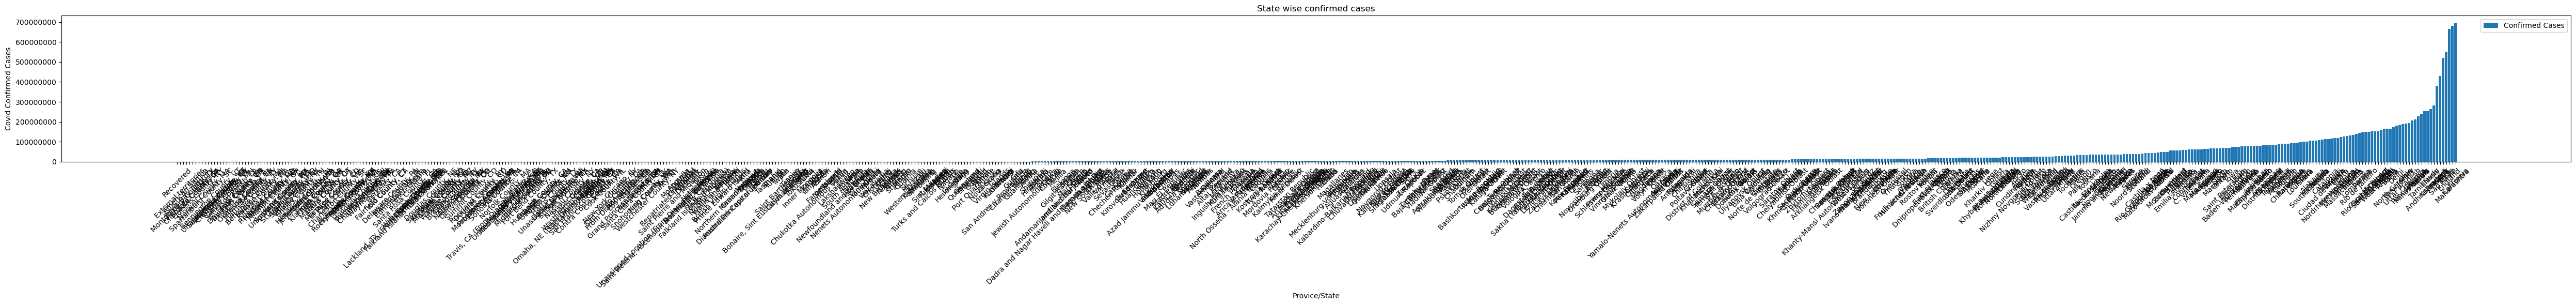

In [476]:
province_conf_cases = df[["Province/State","Confirmed"]]\
.groupby(["Province/State"])[["Confirmed"]].sum().sort_values(by = ["Confirmed"]).reset_index()

x=province_conf_cases["Province/State"]
y=province_conf_cases["Confirmed"]

# Seting the figure size
plt.figure(figsize=(50, 6))

plt.bar(x,y,label="Confirmed Cases")

# Adding labels and title
plt.xlabel('Provice/State')
plt.ylabel('Covid Confirmed Cases')
plt.title('State wise confirmed cases')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format the y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')


# Display the plot
#plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

### Showing below data in table only does not make much sense. Hence, below data is shown in Tabular format followed by Graph for the same

In [303]:
# 9.What is the trend of deaths over time globally?
df_cases[["ObservationDate_Mon_Year","Deaths"]].sort_values(by = "Deaths")

,ObservationDate_Mon_Year,Deaths
0,2020-01,905.0
1,2020-02,46898.0
2,2020-03,386607.0
3,2020-04,4200500.0
4,2020-05,9605979.0
5,2020-06,13294590.0
6,2020-07,18393019.0
7,2020-08,23894263.0
8,2020-09,28123886.0
9,2020-10,34288562.0


### Above question through graph


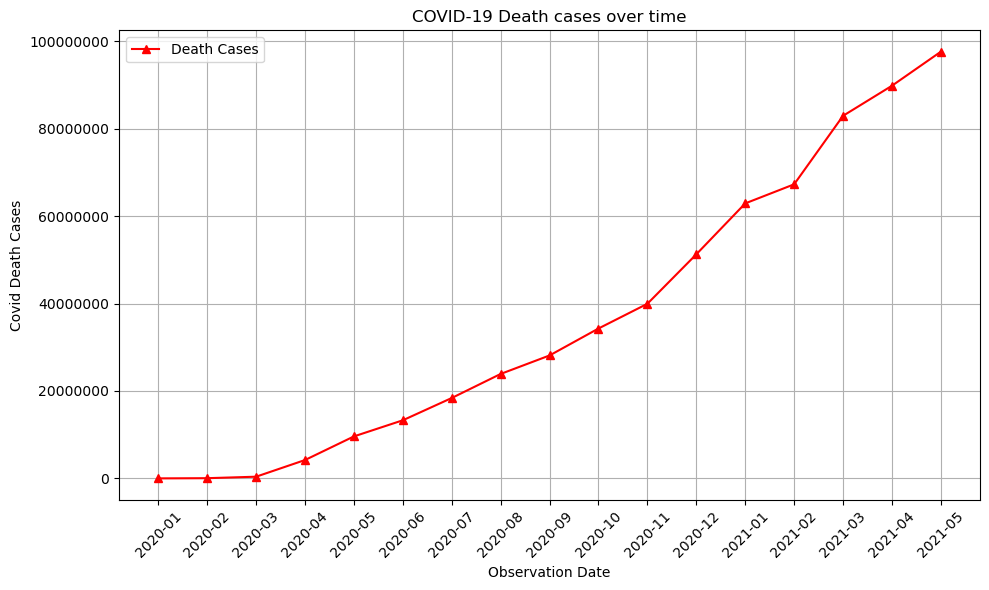

In [305]:
# 9.What is the trend of deaths over time globally?

# Seting the figure size
plt.figure(figsize=(10, 6))

# Ploting the line chart
plt.plot(df_cases['ObservationDate_Mon_Year'], df_cases['Deaths'], color="r", label="Death Cases",marker="^")

# Adding labels and title
plt.xlabel('Observation Date')
plt.ylabel('Covid Death Cases')
plt.title('COVID-19 Death cases over time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format the y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')


# Display the plot
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

In [307]:
# 10.Which country/region has the highest number of recovered cases?
df[["Country/Region","Province/State","Recovered"]][
    df["Recovered"] == df["Recovered"].max()
]

,Country/Region,Province/State,Recovered
179328,US,Recovered,6399531.0


In [423]:
# 11.How does the number of recovered cases vary across different countries/regions?
df[["Country/Region","Recovered"]].groupby(["Country/Region"])[["Recovered"]].sum().sort_values(by = ["Recovered"])

,Recovered
Country/Region,
Azerbaijan,0.00
Channel Islands,0.00
China,0.00
Curacao,0.00
East Timor,0.00
...,...
US,503370956.00
Turkey,564170558.00
Russia,790705716.00


In [481]:
# 12.What is the distribution of confirmed cases by country/region?
country_conf_cases = df[["Country/Region","Confirmed"]]\
    .groupby(["Country/Region"])[["Confirmed"]].sum().sort_values(by = ["Confirmed"]).reset_index()

country_conf_cases

,Country/Region,Confirmed
0,China,0.00
1,Azerbaijan,1.00
2,Channel Islands,1.00
3,East Timor,1.00
4,North Ireland,1.00
...,...,...
224,France,855188962.00
225,Russia,930548849.00
226,Brazil,2653587540.00
227,India,3226768088.00


### Solving above question by graph

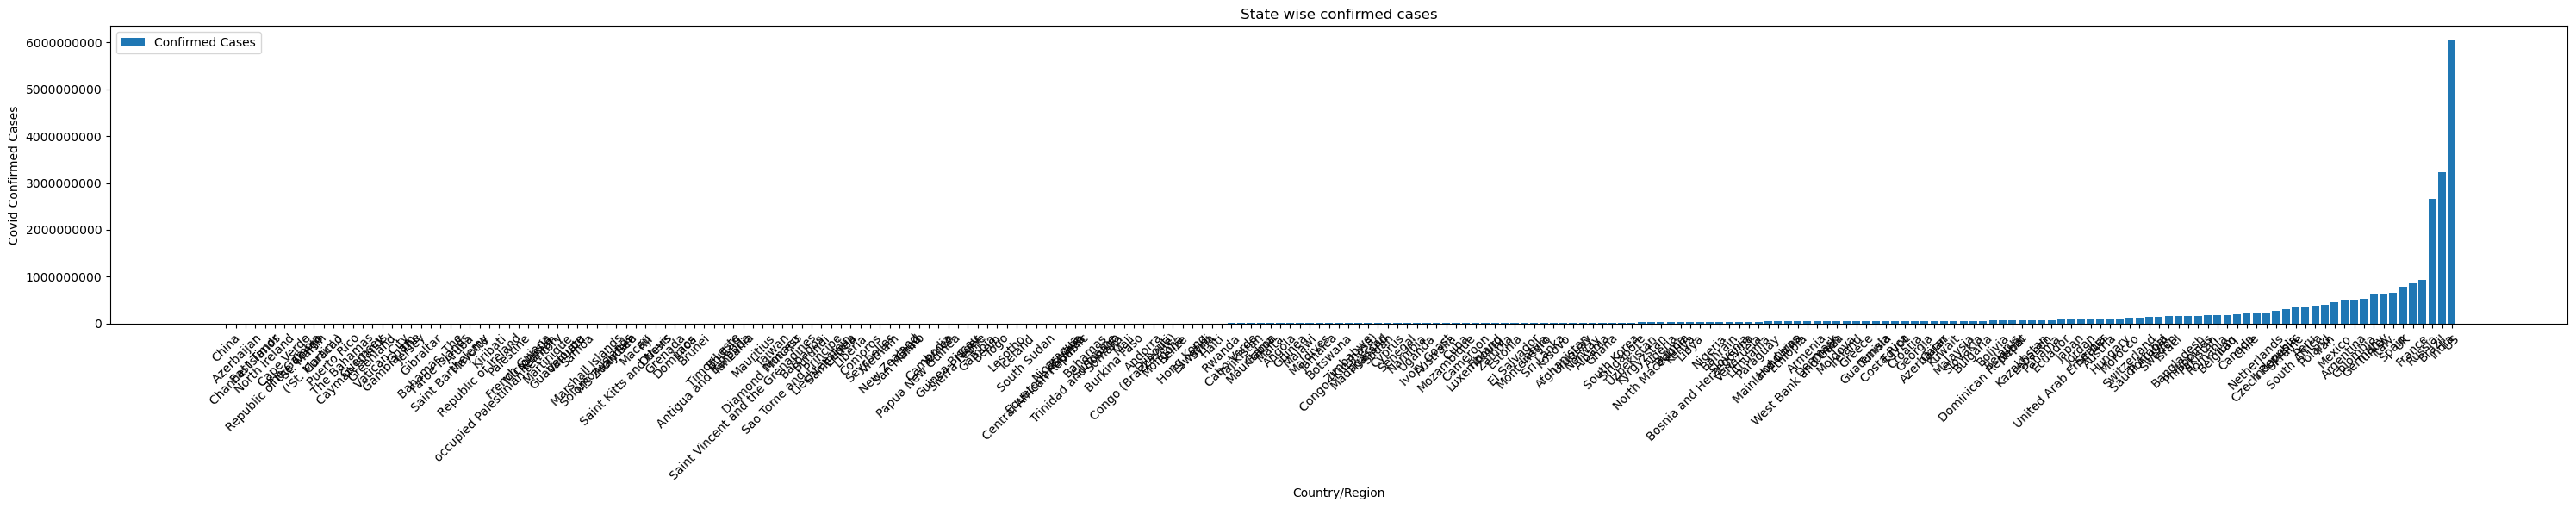

In [485]:
# 12.What is the distribution of confirmed cases by country/region?
"""country_conf_cases = df[["Country/Region","Confirmed"]]\
    .groupby(["Country/Region"])[["Confirmed"]].sum().sort_values(by = ["Confirmed"]).reset_index()"""

x=country_conf_cases["Country/Region"]
y=country_conf_cases["Confirmed"]

# Seting the figure size
plt.figure(figsize=(30, 6))

plt.bar(x,y,label="Confirmed Cases")

# Adding labels and title
plt.xlabel('Country/Region')
plt.ylabel('Covid Confirmed Cases')
plt.title('State wise confirmed cases')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format the y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')


# Display the plot
#plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

In [327]:
# 13.Is there a correlation between the number of confirmed cases and deaths?
corr_confirmed_deaths = df["Confirmed"].corr(df["Deaths"])
print(f"There is a correlation of {round(corr_confirmed_deaths*100,2)}% between Confirmed Covid cases and Death cases")

There is a correlation of 88.84% between Confirmed Covid cases and Death cases


In [329]:
# 14.Is there a correlation between the number of confirmed cases and recovered cases?
corr_confirmed_recovered = df["Confirmed"].corr(df["Recovered"])
print(f"There is a correlation of {round(corr_confirmed_recovered*100,2)}% between Confirmed Covid cases and Recovered cases")

There is a correlation of 63.35% between Confirmed Covid cases and Recovered cases


In [442]:
# 15.How does the mortality rate vary across different countries/regions?

# Defination of function to calculate and return mortality rate
def mortality_rate_calc(group):
    return round((group["Deaths"].sum() / group["Confirmed"].sum())*100,2)

# Group by "Country/Region" and apply calculation for mortality rate
grouped = df[["Country/Region","Deaths","Confirmed"]].groupby("Country/Region")
result = grouped.apply(mortality_rate_calc)
result

Country/Region
 Azerbaijan                       0.00
('St. Martin',)                   0.00
Afghanistan                       3.93
Albania                           1.90
Algeria                           3.01
                                  ... 
West Bank and Gaza                1.05
Yemen                            24.70
Zambia                            1.53
Zimbabwe                          3.66
occupied Palestinian territory    0.00
Length: 229, dtype: float64

In [444]:
# 16.How does the recovery rate vary across different countries/regions?

# Defination of function to calculate and return recovery rate
def recovery_rate_calc(group):
    return round((group["Recovered"].sum() / group["Confirmed"].sum())*100,2)

# Group by "Country/Region" and apply calculation for recovery rate
grouped = df[["Country/Region","Recovered","Confirmed"]].groupby("Country/Region")
result = grouped.apply(recovery_rate_calc)
result

Country/Region
 Azerbaijan                       0.00
('St. Martin',)                   0.00
Afghanistan                      79.08
Albania                          70.54
Algeria                          68.48
                                  ... 
West Bank and Gaza               88.48
Yemen                            52.65
Zambia                           93.57
Zimbabwe                         86.28
occupied Palestinian territory    0.00
Length: 229, dtype: float64

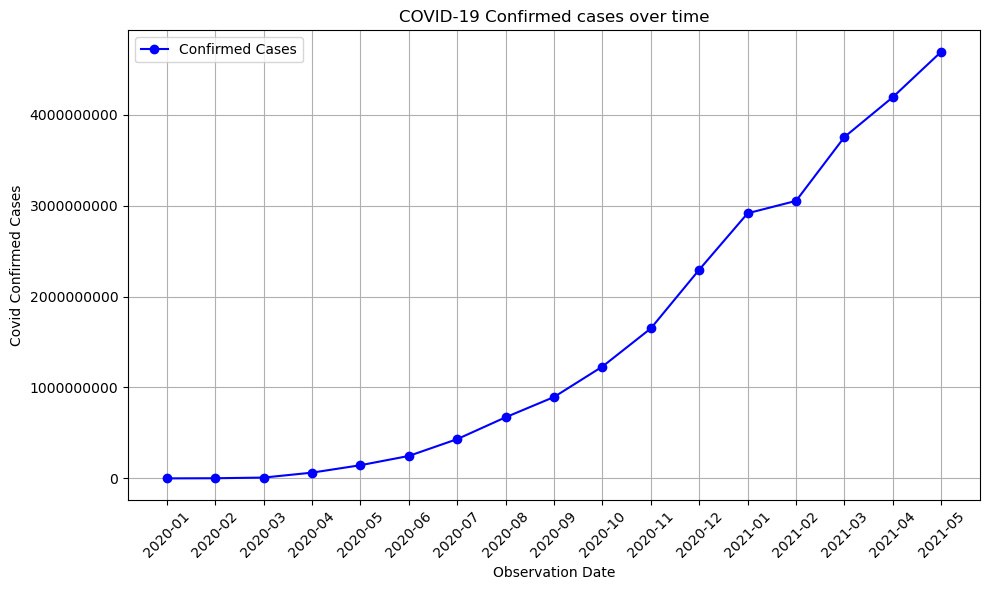

In [488]:
# 17.What is the trend of new confirmed cases over time globally?
# Seting the figure size
plt.figure(figsize=(10, 6))

# Ploting the line chart
plt.plot(df_cases['ObservationDate_Mon_Year'], df_cases['Confirmed'], color="blue", label="Confirmed Cases",marker="o")

# Adding labels and title
plt.xlabel('Observation Date')
plt.ylabel('Covid Confirmed Cases')
plt.title('COVID-19 Confirmed cases over time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format the y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')


# Display the plot
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

In [446]:
# 18.How does the fatality rate vary across different provinces/states?

# Defination of function to calculate and return mortality rate
def mortality_rate_calc(group):
    return round((group["Deaths"].sum() / group["Confirmed"].sum())*100,2)

# Group by "Province/State" and apply calculation for mortality rate
grouped = df[["Province/State","Deaths","Confirmed"]].groupby("Province/State")
result = grouped.apply(mortality_rate_calc)
result

Province/State
 Montreal, QC         0.00
 Norfolk County, MA   0.00
Abruzzo               3.84
Acre                  2.02
Adygea Republic       1.01
                      ... 
Zaporizhia Oblast     1.63
Zeeland               1.24
Zhejiang              0.07
Zhytomyr Oblast       1.76
Zuid-Holland          1.52
Length: 736, dtype: float64

In [448]:
# 19.How does the recovery rate vary across different provinces/states?

# Defination of function to calculate and return recovery rate
def recovery_rate_calc(group):
    return round((group["Recovered"].sum() / group["Confirmed"].sum())*100,2)

# Group by "Country/Region" and apply calculation for recovery rate
grouped = df[["Province/State","Recovered","Confirmed"]].groupby("Province/State")
result = grouped.apply(recovery_rate_calc)
result

Province/State
 Montreal, QC          0.00
 Norfolk County, MA    0.00
Abruzzo               73.12
Acre                  82.62
Adygea Republic       87.50
                       ... 
Zaporizhia Oblast     74.01
Zeeland                0.00
Zhejiang              95.91
Zhytomyr Oblast       79.36
Zuid-Holland           0.00
Length: 736, dtype: float64

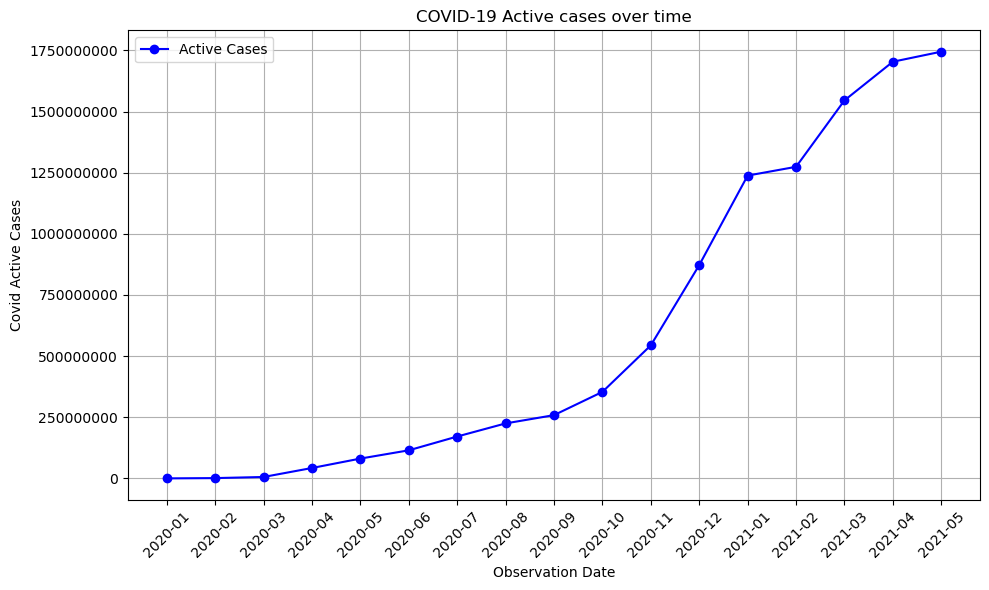

In [413]:
# 20.What is the trend of active cases over time globally?

# Calculating number of active cases
df["Active Cases"] = df["Confirmed"]-df["Recovered"]-df["Deaths"]
df_active = df[["ObservationDate_Mon_Year","Active Cases"]].groupby(["ObservationDate_Mon_Year"])[["Active Cases"]].sum().reset_index()

x = df_active["ObservationDate_Mon_Year"]
y = df_active["Active Cases"]

# Seting the figure size
plt.figure(figsize=(10, 6))

# ploting data on graph
plt.plot(x,y,color='b',marker="o", label="Active Cases")


# Adding labels and title
plt.xlabel('Observation Date')
plt.ylabel('Covid Active Cases')
plt.title('COVID-19 Active cases over time')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Format the y-axis tick labels
plt.ticklabel_format(style='plain', axis='y')


# Display the plot
plt.grid(True)
plt.tight_layout()
plt.legend()

plt.show()

In [438]:
# 20.What is the trend of active cases over time globally?
df[["ObservationDate_Mon_Year", "Active Cases"]].groupby("ObservationDate_Mon_Year")[["Active Cases"]].sum().reset_index()

,ObservationDate_Mon_Year,Active Cases
0,2020-01,37178.00
1,2020-02,1244225.00
2,2020-03,5802152.00
3,2020-04,42532573.00
4,2020-05,81033575.00
5,2020-06,114840836.00
6,2020-07,171265531.00
7,2020-08,224846746.00
8,2020-09,258686071.00
9,2020-10,353776221.00


### Downloading data in form of CSV file to verify answers

In [421]:
df.to_csv("Covid_pd_data.csv", index=False)